### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
books = pd.read_csv('Books.csv',low_memory=False)
users = pd.read_csv('Users.csv',low_memory=False)
ratings = pd.read_csv('Ratings.csv',low_memory=False)


In [2]:
ratings = ratings.rename(columns={"User-ID": "UserID", "Book-Rating":"BookRating"})
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['UserID', 'ISBN', 'BookRating']


In [3]:
books = books.rename(columns={"Book-Title": "BookTitle", "Book-Author":"BookAuthor", "Year-Of-Publication":"YearOfPublication"})
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis =1)
print(books.shape)
print(list(books.columns))

(271360, 5)
['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher']


In [4]:
users = users.rename(columns={"User-ID": "UserID"})
print(users.shape)
print(list(users.columns))

(278858, 3)
['UserID', 'Location', 'Age']


### Exploratory Data Analysis

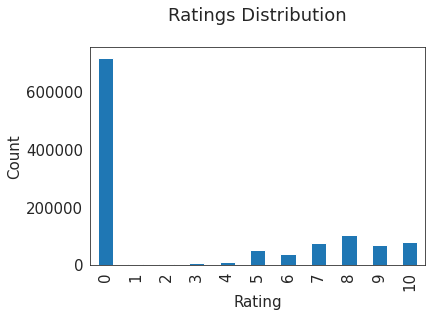

In [5]:
plt.rc("font", size=15)
ratings.BookRating.value_counts(sort=False).plot(kind="bar")
plt.title("Ratings Distribution\n")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

### Finding Popular movie by average weighted value

In [5]:
new_ratings = pd.DataFrame(ratings.groupby('ISBN')['BookRating'].mean())
new_ratings["NumberOfRating"] = pd.DataFrame(ratings.groupby('ISBN')['BookRating'].count())

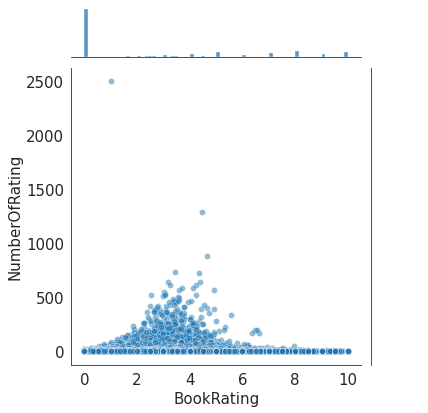

In [54]:
sns.jointplot(x='BookRating', y='NumberOfRating', data=new_ratings, alpha=0.5)


In [6]:
new_ratings.sort_values('NumberOfRating', ascending=False).head()
print(new_ratings.shape)

(340556, 2)


In [7]:
new_ratings_filtered = new_ratings[new_ratings['NumberOfRating'] > 50 ]
print(new_ratings_filtered.shape)

(2125, 2)


In [8]:
new_ratings_filtered = new_ratings_filtered.rename(columns={"BookRating": "AvgBookRating"})

In [9]:
new_ratings_filtered.sort_values('AvgBookRating', ascending=False).head()

,AvgBookRating,NumberOfRating
ISBN,,
1844262553,7.962963,54
0439064864,6.611765,170
0439139597,6.541237,194
0439136350,6.467005,197
0590353403,6.363095,168


In [10]:
all_details = pd.merge(new_ratings_filtered, books, on=["ISBN"])

In [11]:
all_details.sort_values('AvgBookRating', ascending=False)

,ISBN,AvgBookRating,NumberOfRating,BookTitle,BookAuthor,YearOfPublication,Publisher
2088,1844262553,7.962963,54,Free,Paul Vincent,2003,Upfront Publishing
853,0439064864,6.611765,170,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic
857,0439139597,6.541237,194,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
855,0439136350,6.467005,197,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic
1616,0590353403,6.363095,168,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic
...,...,...,...,...,...,...,...
2028,0971880107,1.019584,2502,Wild Animus,Rich Shapero,2004,Too Far
1031,0446356832,1.011905,84,The Sands of Time,Sidney Sheldon,1989,Warner Books
810,0425173534,0.970149,67,Ssn,Tom Clancy,2000,Berkley Publishing Group
2038,1401088945,0.735294,68,Ground Zero and Beyond,J. P. McCarthy,2003,Xlibris Corporation


In [12]:
v=all_details['NumberOfRating']
R=all_details['AvgBookRating']
C=all_details['AvgBookRating'].mean()
m=all_details['NumberOfRating'].quantile(0.70)

In [13]:
all_details['weighted_average']=((R*v)+ (C*m))/(v+m)

In [14]:
all_details.sort_values('weighted_average',ascending=False)

,ISBN,AvgBookRating,NumberOfRating,BookTitle,BookAuthor,YearOfPublication,Publisher,weighted_average
857,0439139597,6.541237,194,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,5.271161
855,0439136350,6.467005,197,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,5.235707
853,0439064864,6.611765,170,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,5.204643
1616,0590353403,6.363095,168,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,5.043082
859,043935806X,5.571856,334,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,4.940929
...,...,...,...,...,...,...,...,...
766,0425147363,1.440299,134,Tom Clancy's Op-Center (Tom Clancy's Op Center...,Tom Clancy,1995,Berkley Publishing Group,2.131780
1031,0446356832,1.011905,84,The Sands of Time,Sidney Sheldon,1989,Warner Books,2.124431
2038,1401088945,0.735294,68,Ground Zero and Beyond,J. P. McCarthy,2003,Xlibris Corporation,2.118697
1044,0446365505,1.245614,114,Pleading Guilty,Scott Turow,1994,Warner Books,2.094102


### Calculating score based on Book Rating and Number of Rating

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
book_scaled_df=scaling.fit_transform(all_details[['AvgBookRating','NumberOfRating']])
book_normalized_df=pd.DataFrame(book_scaled_df,columns=['AvgBookRating','NumberOfRating'])
book_normalized_df.head()

,AvgBookRating,NumberOfRating
0,0.407882,0.015504
1,0.119473,0.007344
2,0.442991,0.006120
3,0.400003,0.048960
4,0.389157,0.010200


In [16]:
all_details[['normalized_AvgBookRating','normalized_NumberOfRating']]= book_normalized_df


In [17]:
all_details.head()

,ISBN,AvgBookRating,NumberOfRating,BookTitle,BookAuthor,YearOfPublication,Publisher,weighted_average,normalized_AvgBookRating,normalized_NumberOfRating
0,000649840X,3.573034,89,Angelas Ashes,Frank Mccourt,0,Harpercollins Uk,3.253252,0.407882,0.015504
1,002026478X,1.434783,69,AGE OF INNOCENCE (MOVIE TIE-IN),Edith Wharton,1993,Scribner,2.383563,0.119473,0.007344
2,0020442203,3.833333,66,"Lion, the Witch and the Wardrobe",C.S. Lewis,1970,MacMillan Publishing Company.,3.309717,0.442991,0.006120
3,002542730X,3.514620,171,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,3.311436,0.400003,0.048960
4,0028604199,3.434211,76,Once upon a More Enlightened Time: More Politi...,James Finn Garner,1995,MacMillan Publishing Company.,3.173319,0.389157,0.010200


In [21]:
all_details['score'] = all_details['normalized_AvgBookRating'] * 0.5 + all_details['normalized_NumberOfRating'] * 0.5
books_details_df = all_details.sort_values(['BookTitle'])
books_details_df.head(20)


,ISBN,AvgBookRating,NumberOfRating,BookTitle,BookAuthor,YearOfPublication,Publisher,weighted_average,normalized_AvgBookRating,normalized_NumberOfRating,score
2047,1551668300,1.907692,65,16 Lighthouse Road,Debbie Macomber,2001,Mira,2.583183,0.183259,0.005712,0.094486
1308,0451524934,4.614583,192,1984,George Orwell,1990,Signet Book,4.029636,0.548367,0.057528,0.302947
1123,0446610038,3.498721,391,1st to Die: A Novel,James Patterson,2002,Warner Vision,3.388558,0.397859,0.138719,0.268289
279,0316666009,3.830508,118,1st to Die: A Novel,James Patterson,2001,Little Brown and Company,3.428720,0.442610,0.027336,0.234973
322,0345303067,2.721519,79,2010: Odyssey Two,Arthur C. Clarke,1984,Del Rey Books,2.876421,0.293029,0.011424,0.152226
2053,1551669293,1.704225,71,204 Rosewood Lane,Debbie Macomber,2002,Mira,2.479836,0.155815,0.008160,0.081988
1283,0451203593,2.434211,76,24 Hours,Greg Iles,2001,Signet Book,2.760275,0.254276,0.010200,0.132238
284,0316693200,3.704000,125,2nd Chance,James Patterson,2002,"Little, Brown",3.372921,0.425547,0.030192,0.227869
1146,0446612790,3.034934,229,2nd Chance,James Patterson,2003,Warner Vision,3.020447,0.335303,0.072623,0.203963
278,0316603570,4.037500,80,3rd Degree,James Patterson,2004,"Little, Brown",3.435589,0.470530,0.011832,0.241181


In [32]:
all_details['new_score'] = all_details['score'] * 0.5 + all_details['weighted_average'] * 0.5
books_details_df = all_details.sort_values(['BookTitle'])
books_details_df.head(20)

,ISBN,AvgBookRating,NumberOfRating,BookTitle,BookAuthor,YearOfPublication,Publisher,weighted_average,normalized_AvgBookRating,normalized_NumberOfRating,score,new_score
2047,1551668300,1.907692,65,16 Lighthouse Road,Debbie Macomber,2001,Mira,2.583183,0.183259,0.005712,0.094486,1.338834
1308,0451524934,4.614583,192,1984,George Orwell,1990,Signet Book,4.029636,0.548367,0.057528,0.302947,2.166292
1123,0446610038,3.498721,391,1st to Die: A Novel,James Patterson,2002,Warner Vision,3.388558,0.397859,0.138719,0.268289,1.828424
279,0316666009,3.830508,118,1st to Die: A Novel,James Patterson,2001,Little Brown and Company,3.428720,0.442610,0.027336,0.234973,1.831846
322,0345303067,2.721519,79,2010: Odyssey Two,Arthur C. Clarke,1984,Del Rey Books,2.876421,0.293029,0.011424,0.152226,1.514324
2053,1551669293,1.704225,71,204 Rosewood Lane,Debbie Macomber,2002,Mira,2.479836,0.155815,0.008160,0.081988,1.280912
1283,0451203593,2.434211,76,24 Hours,Greg Iles,2001,Signet Book,2.760275,0.254276,0.010200,0.132238,1.446257
284,0316693200,3.704000,125,2nd Chance,James Patterson,2002,"Little, Brown",3.372921,0.425547,0.030192,0.227869,1.800395
1146,0446612790,3.034934,229,2nd Chance,James Patterson,2003,Warner Vision,3.020447,0.335303,0.072623,0.203963,1.612205
278,0316603570,4.037500,80,3rd Degree,James Patterson,2004,"Little, Brown",3.435589,0.470530,0.011832,0.241181,1.838385


In [23]:
books_details_df = books_details_df.reset_index(drop=True)

In [33]:
books_details_df

,ISBN,AvgBookRating,NumberOfRating,BookTitle,BookAuthor,YearOfPublication,Publisher,weighted_average,normalized_AvgBookRating,normalized_NumberOfRating,score,new_score
2047,1551668300,1.907692,65,16 Lighthouse Road,Debbie Macomber,2001,Mira,2.583183,0.183259,0.005712,0.094486,1.338834
1308,0451524934,4.614583,192,1984,George Orwell,1990,Signet Book,4.029636,0.548367,0.057528,0.302947,2.166292
1123,0446610038,3.498721,391,1st to Die: A Novel,James Patterson,2002,Warner Vision,3.388558,0.397859,0.138719,0.268289,1.828424
279,0316666009,3.830508,118,1st to Die: A Novel,James Patterson,2001,Little Brown and Company,3.428720,0.442610,0.027336,0.234973,1.831846
322,0345303067,2.721519,79,2010: Odyssey Two,Arthur C. Clarke,1984,Del Rey Books,2.876421,0.293029,0.011424,0.152226,1.514324
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0553277472,3.119565,184,Zen and the Art of Motorcycle Maintenance: An ...,ROBERT PIRSIG,1984,Bantam,3.071543,0.346718,0.054264,0.200491,1.636017
889,0440203856,1.186047,86,Zoya,Danielle Steel,1989,Dell,2.190158,0.085923,0.014280,0.050101,1.120130
1975,0805059555,3.404255,94,"\O\"" Is for Outlaw""",Sue Grafton,1999,Henry Holt &amp; Company,3.182627,0.385117,0.017544,0.201330,1.691979
1167,0449003787,2.765714,175,"\O\"" Is for Outlaw""",SUE GRAFTON,2001,Ballantine Books,2.851204,0.298990,0.050592,0.174791,1.512997


In [34]:
books_details_df = books_details_df.drop_duplicates(['BookTitle'])


In [35]:
popular_books = books_details_df
popular_books = popular_books.drop(["weighted_average", "normalized_AvgBookRating", "normalized_NumberOfRating", "score"],axis = 1)

In [36]:
popular_books = popular_books.reset_index(drop=True)

In [37]:
popular_books

,ISBN,AvgBookRating,NumberOfRating,BookTitle,BookAuthor,YearOfPublication,Publisher,new_score
0,1551668300,1.907692,65,16 Lighthouse Road,Debbie Macomber,2001,Mira,1.338834
1,0451524934,4.614583,192,1984,George Orwell,1990,Signet Book,2.166292
2,0446610038,3.498721,391,1st to Die: A Novel,James Patterson,2002,Warner Vision,1.828424
3,0345303067,2.721519,79,2010: Odyssey Two,Arthur C. Clarke,1984,Del Rey Books,1.514324
4,1551669293,1.704225,71,204 Rosewood Lane,Debbie Macomber,2002,Mira,1.280912
...,...,...,...,...,...,...,...,...
1908,0671004549,2.731707,123,You Belong To Me,Mary Higgins Clark,1999,Pocket Books,1.507115
1909,0553277472,3.119565,184,Zen and the Art of Motorcycle Maintenance: An ...,ROBERT PIRSIG,1984,Bantam,1.636017
1910,0440203856,1.186047,86,Zoya,Danielle Steel,1989,Dell,1.120130
1911,0805059555,3.404255,94,"\O\"" Is for Outlaw""",Sue Grafton,1999,Henry Holt &amp; Company,1.691979


In [38]:
popular_books.to_csv("popular_books.csv", index=False)